In [85]:
from Statistics_and_Seq2Seq.all_functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
def read_data(directory_path, tf='normal'):
    dataframes = []

    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path, sep=";")
            df = df[df['DATA'] == tf]
            dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [86]:
produto = "glp"
metrica = "PBE"

path_lstm = './lstm_results.xlsx'
df_lstm = pd.read_excel(path_lstm)
df_lstm = df_lstm[df_lstm['PRODUCT'] == produto]

In [87]:
path_rocket = './results_lucas.csv'
df_rocket = pd.read_csv(path_rocket, sep=";")
df_rocket = df_rocket[df_rocket['produto'] == produto]

In [88]:
path_arima = f'./Statistics_and_Seq2Seq/results/arima/rolling/{produto}'
df_arima = read_data(path_arima)

path_sarima = f'./Statistics_and_Seq2Seq/results/sarima/rolling/{produto}'
df_sarima = read_data(path_sarima)

path_hybrid = f'./Statistics_and_Seq2Seq/paper2/comb_regressors_norm_all/{produto}'
df_hybrid = read_data(path_hybrid, 'max')



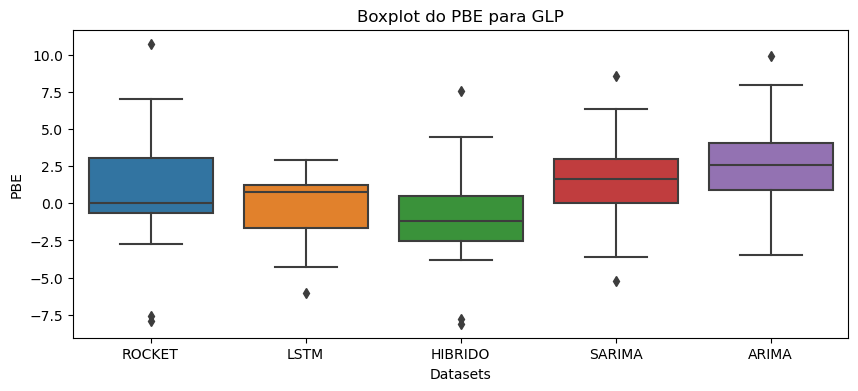

In [89]:
dfs = [df_lstm, df_arima, df_sarima, df_rocket, df_hybrid] 
labels = ['LSTM', 'ARIMA', 'SARIMA', 'ROCKET', 'HIBRIDO']

pbe_data = []

for i, df in enumerate(dfs):
    if labels[i] == 'LSTM':
        pbe_data.append(df[f'{metrica}_RESCALED'].dropna())
    else:
        pbe_data.append(df[metrica].dropna())

medians = [data.median() for data in pbe_data]
sorted_indices = np.argsort(np.abs(medians))

sorted_pbe_data = [pbe_data[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]

plt.figure(figsize=(10, 4))
sns.boxplot(data=sorted_pbe_data)
plt.xticks(ticks=range(len(sorted_labels)), labels=sorted_labels)
plt.xlabel('Datasets')
plt.ylabel(metrica)
plt.title(f'Boxplot do {metrica} para GLP')

plt.show()